[View in Colaboratory](https://colab.research.google.com/github/mogamin/chainer-examples/blob/master/chainer_utils.ipynb)

In [105]:
#!apt install lsof
#!lsof /dev/nvidia*

# colab上でのメモリ,GPU使用率を見る
#
#!ps f -o user,pgrp,pid,pcpu,pmem,start,time,command -p `lsof -n -w -t /dev/nvidia*`
#!kill -9 874
!/opt/bin/nvidia-smi


Wed Aug 15 10:27:01 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    74W / 149W |      1MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

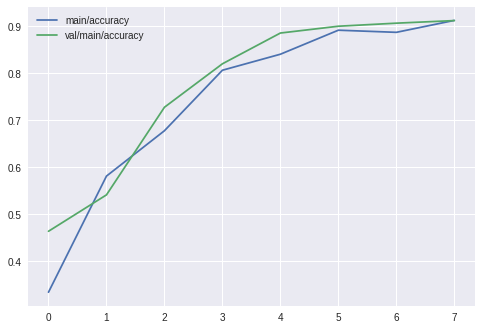

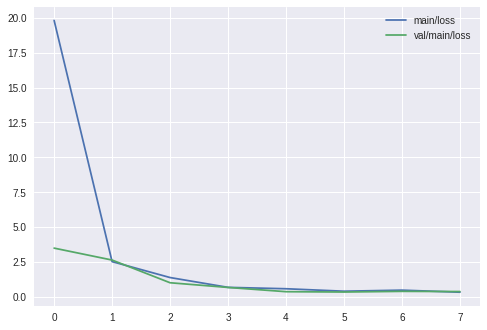

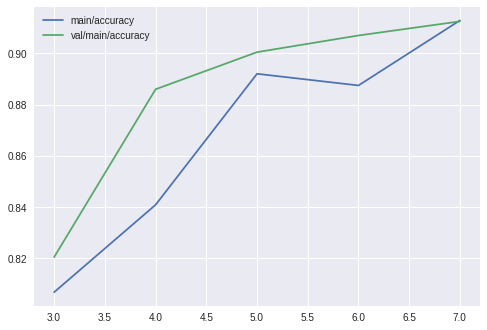

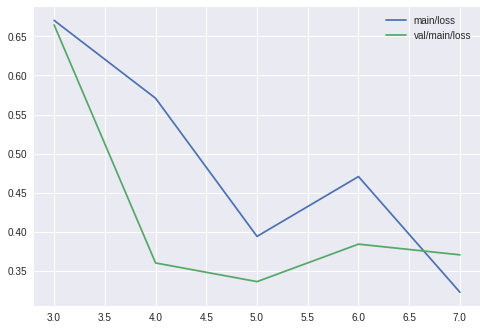

In [95]:
import json
import pandas as pd
with open('result/potato/log') as f:
  result = pd.DataFrame(json.load(f)).interpolate()

result
result[['main/accuracy','val/main/accuracy']].plot()
result[['main/loss','val/main/loss']].plot()

result = result.iloc[3:,:]
result[['main/accuracy','val/main/accuracy']].plot()
result[['main/loss','val/main/loss']].plot()

#import matplotlib.pyplot as plt
#plt.plot(result[['main/accuracy','val/main/accuracy']])
#plt.savefig('result/potato/accuracy.png')

In [0]:
#!ls -l
#!ls -l result/potato/
!zip ./result_pattern22.zip -jr result/potato/

#!ls -l
from google.colab import files
files.download('result_pattern22.zip')

updating: log (deflated 82%)
updating: accuracy.png (deflated 5%)
updating: test_result.txt (deflated 8%)
